# Native Programming

In [1]:
# general imports
import networkx as nx
from math import pi
import matplotlib.pyplot as plt
import networkx as nx
from braket.tracking import Tracker
from qiskit_braket_provider import BraketProvider
from qiskit import QuantumCircuit
from qiskit_ionq import GPIGate, GPI2Gate, MSGate
#%matplotlib inline
t = Tracker().start()

### Set up the Braket Provider

This step initializes the Braket provider and lists all available backends. These are the quantum devices or simulators that you can use.

In [2]:
provider = BraketProvider()
backends = provider.backends()
print(backends)

[BraketBackend[Ankaa-3], BraketBackend[Aria 1], BraketBackend[Aria 2], BraketBackend[Forte 1], BraketBackend[Forte Enterprise 1], BraketBackend[Garnet], BraketBackend[SV1], BraketBackend[TN1], BraketBackend[dm1]]


# Superconducting Qubits based Quantum Systems 

## Ankaa -3

### Native Gates

Retrieve the native gate set supported by the Ankaa-3 device. This includes only those gates that are natively implemented in hardware.

In [3]:
Ankaa_3 = provider.get_backend("Ankaa-3")
ankaa_supported_gates = Ankaa_3._get_gateset(native=True)
print(ankaa_supported_gates)

{'rz', 'rx', 'iswap'}


### Coupling Map

### Visualize Ankaa-3 Coupling Map

This code block extracts and plots the connectivity (coupling map) of qubits for the Ankaa-3 quantum device.

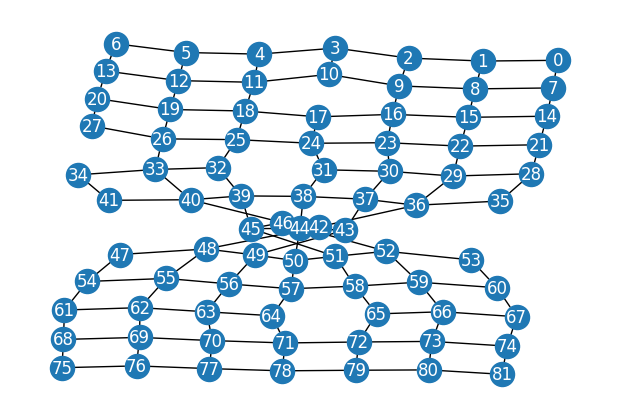

In [4]:
coupling_map_ankaa = Ankaa_3.coupling_map
G_direct_ankaa = nx.Graph()
G_direct_ankaa.add_edges_from(coupling_map_ankaa)

plt.figure(figsize=(6, 4))
nx.draw_kamada_kawai(
    G_direct_ankaa,
    with_labels=True,
    font_color="white",
    arrows=True,
    arrowsize=30,
)
plt.show()

## IQM's Garnet

Retrieve the native gate set supported by the Garnet device. This includes only those gates that are natively implemented in hardware.

In [5]:
garnet = provider.get_backend("Garnet")
garnet_supported_gates = garnet._get_gateset(native=True)
print(garnet_supported_gates)

{'r', 'cz'}


### Visualize Garnet Coupling Map

This code block extracts and plots the connectivity (coupling map) of qubits for the Garnet quantum device.

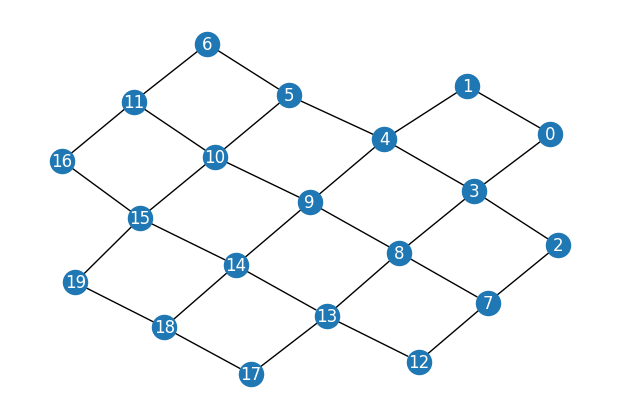

In [6]:
coupling_map_garnet = garnet.coupling_map
G_direct_garnet = nx.Graph()
G_direct_garnet.add_edges_from(coupling_map_garnet)

plt.figure(figsize=(6, 4))
nx.draw_kamada_kawai(
    G_direct_garnet,
    with_labels=True,
    font_color="white",
    arrows=True,
    arrowsize=30,
)
plt.show()

# Trapped Ion Based Quantum Systems

## IonQ's Aria-1 

### Native Gates

Retrieve the native gate set supported by the Aria-1 device. This includes only those gates that are natively implemented in hardware.

In [7]:
Aria_1 = provider.get_backend("Aria 1")
aria_supported_gates = Aria_1._get_gateset(native=True)
print(aria_supported_gates)

{'ms', 'gpi', 'gpi2'}


### Coupling Map

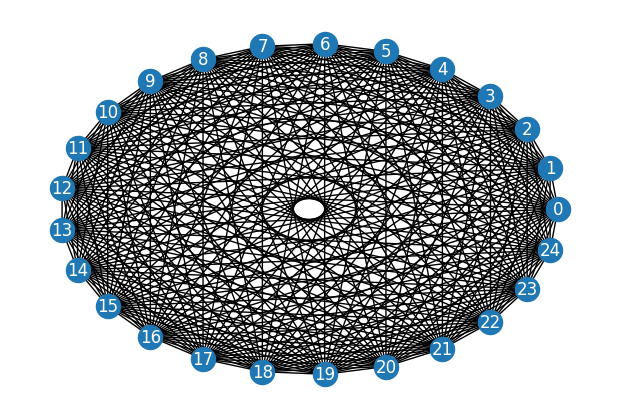

In [8]:
coupling_map_aria = Aria_1.coupling_map
G_direct_aria = nx.Graph()
G_direct_aria.add_edges_from(coupling_map_aria)

plt.figure(figsize=(6, 4))
nx.draw_kamada_kawai(
    G_direct_aria,
    with_labels=True,
    font_color="white",
    arrows=True,
    arrowsize=30,
)
plt.show()

If we create a circuit with gates that are not part of that list, the gates will automatically be decomposed into a gate set that can be executed on the device.

### Running Normally on Aria-1 Quantum Hardware

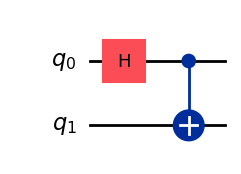

In [9]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.draw(output='mpl')
#result = Aria_1.run(circuit, shots=10)

#plot_histogram(result.result().get_counts())

### Running with Native Gates & Verbatim Compilation

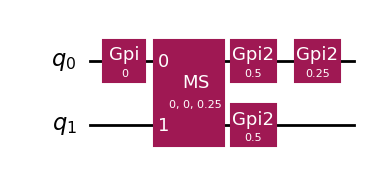

In [10]:
native_circuit=QuantumCircuit(2)
native_circuit.append(GPIGate(0), [0])
native_circuit.append(MSGate(0, 0,0.25), [0, 1])
native_circuit.append(GPI2Gate(0.5), [1])
native_circuit.append(GPI2Gate(0.5), [0])
native_circuit.append(GPI2Gate(0.25), [0])
native_circuit.draw('mpl')

In [11]:
#Aria_1.run(native_circuit, verbatim=True)

## Conclusion 
This notebook introduced the basic functionality of verbatim compilation of Amazon Braket, that allows you to run circuits or subcircuits to be executed exactly as defined without any compiler modifications.

In [12]:
print("Quantum Task Summary")
print(t.quantum_tasks_statistics())
print(
    "Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).",
)
print(
    f"Estimated cost to run this example: {t.qpu_tasks_cost() + t.simulator_tasks_cost():.3f} USD",
)

Quantum Task Summary
{}
Note: Charges shown are estimates based on your Amazon Braket simulator and quantum processing unit (QPU) task usage. Estimated charges shown may differ from your actual charges. Estimated charges do not factor in any discounts or credits, and you may experience additional charges based on your use of other services such as Amazon Elastic Compute Cloud (Amazon EC2).
Estimated cost to run this example: 0.000 USD
